# Pymaceuticals Inc.
---

### Analysis

Based on my analysis a few conclusions that can be made from this data are that mouse weight seems to have a direct correlation to the size of a tumor, Capomulin worked better than most drugs but gives comparable results to Ramicane. An inference that I can make supported by this summary is that the health and weight of the mouse has a stronger impact on the size of the tumor than the drug being used.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study=pd.merge(study_results,mouse_metadata,how='left', on="Mouse ID")

# Display the data table for preview
combined_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice.
mice_count=combined_mouse_study["Mouse ID"].nunique()
mice_count

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice= combined_mouse_study.loc[combined_mouse_study.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= combined_mouse_study.loc[combined_mouse_study["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_study= combined_mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
cleaned_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
cleaned_mouse_study= combined_mouse_study[combined_mouse_study["Mouse ID"].isin(duplicate_mice)==False]

In [55]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count=cleaned_mouse_study["Mouse ID"].nunique()
cleaned_mice_count

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_groups=[cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()]
tumor_vol= np.array([tumor_vol_groups])
mean= cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var= cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std= cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
standard_errors = cleaned_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df=pd.DataFrame({"mean":mean,"median":median,
                         "variance":var,
                         "standard deviation":std,
                        "SEM":standard_errors})
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

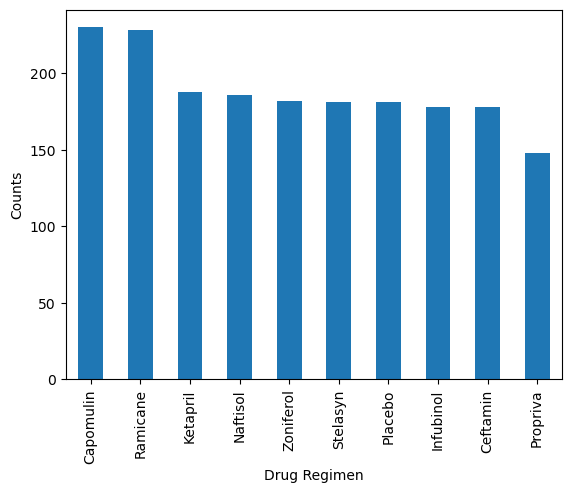

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_mouse_study['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.show()


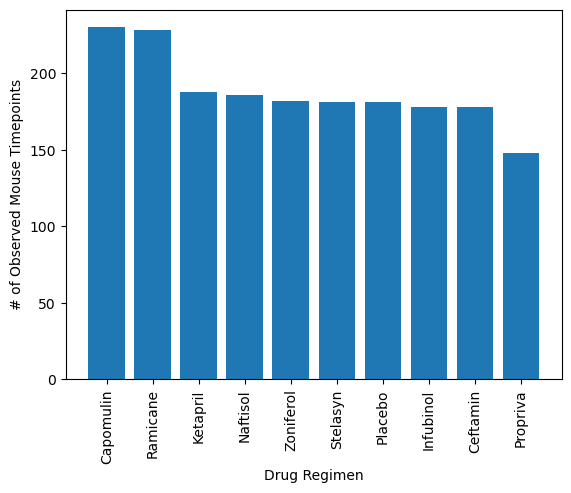

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen= cleaned_mouse_study['Drug Regimen'].value_counts()
plt.bar(Drug_Regimen.index.values,Drug_Regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

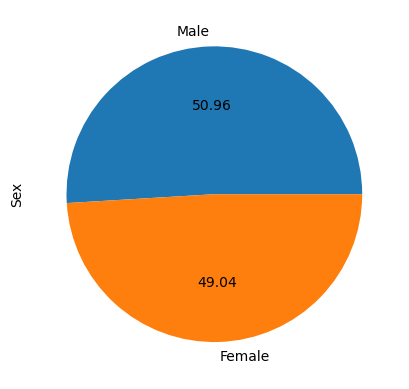

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=cleaned_mouse_study['Sex'].value_counts()
gender_count.plot(kind='pie', autopct="%.2f")



plt.show()



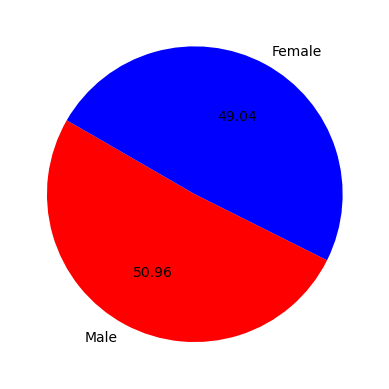

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=cleaned_mouse_study['Sex'].value_counts()
labels = gender_count.index.values
explode=(0,0)
colors=["red","blue"]

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%.2f", shadow=False, startangle=150)

plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, Ceftamin

capomulin_df= cleaned_mouse_study[cleaned_mouse_study['Drug Regimen']=='Capomulin']
ramicane_df= cleaned_mouse_study[cleaned_mouse_study['Drug Regimen']=='Ramicane']
infubinol_df= cleaned_mouse_study[cleaned_mouse_study['Drug Regimen']=='Infubinol']
ceftamin_df= cleaned_mouse_study[cleaned_mouse_study['Drug Regimen']=='Ceftamin']

reduced_list= [capomulin_df,ramicane_df, infubinol_df, ceftamin_df]
reduced_df= pd.concat(reduced_list)

# Start by getting the last (greatest) timepoint for each mouse

capomulin_max= capomulin_df.groupby(['Mouse ID']).max()['Timepoint']
ramicane_max= ramicane_df.groupby(['Mouse ID']).max()['Timepoint']
infubinol_max= infubinol_df.groupby(['Mouse ID']).max()['Timepoint']
ceftamin_max= ceftamin_df.groupby(['Mouse ID']).max()['Timepoint']
max_list=[capomulin_max,ramicane_max, infubinol_max,ceftamin_max]
reduced_max= pd.concat(max_list)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data= pd.merge(reduced_max, reduced_df, how='left', on=['Mouse ID','Timepoint'])
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
 
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    lower_bound= lowerq-(1.5*iqr)
    upper_bound= upperq+(1.5*iqr)
    outliers= final_tumor_vol[((final_tumor_vol<lower_bound)| (final_tumor_vol>upper_bound))]
    
    print(f'The outliers for {drug} are {outliers}')
   

    

The outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
The outliers for Infubinol are 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x28bc306d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28bc30c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x28bc30430>,
 'medians': [<matplotlib.lines.Line2D at 0x28bc31150>,
 'fliers': [<matplotlib.lines.Line2D at 0x28bc313f0>,
 'means': []}

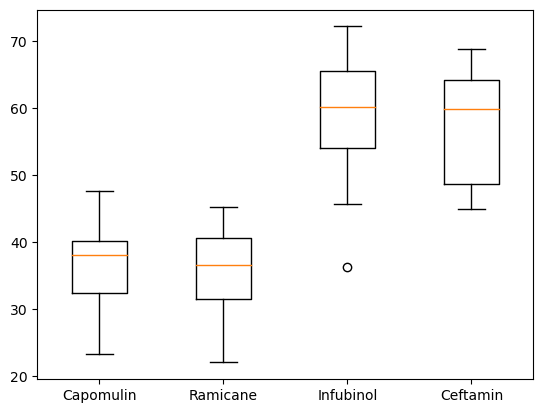

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)

## Line and Scatter Plots

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin=cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"]== "Capomulin"]
mouse_data= capomulin.loc[capomulin["Mouse ID"]== "l509"]

/var/folders/dp/101_4gnj0cj1cwkyzl6hn1jr0000gn/T/ipykernel_9287/1521578960.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg= capomulin.groupby(["Mouse ID"]).mean()


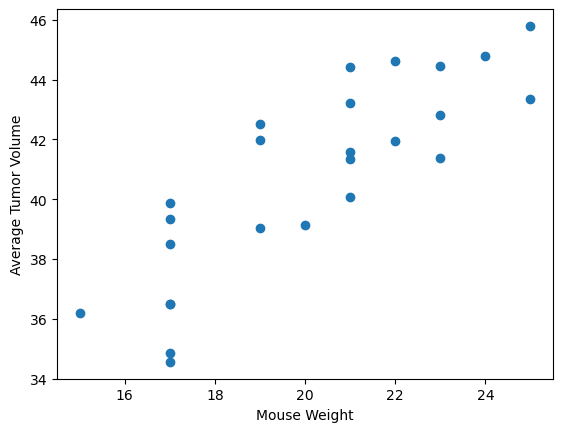

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin=cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"]== "Capomulin"]
capomulin_avg= capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

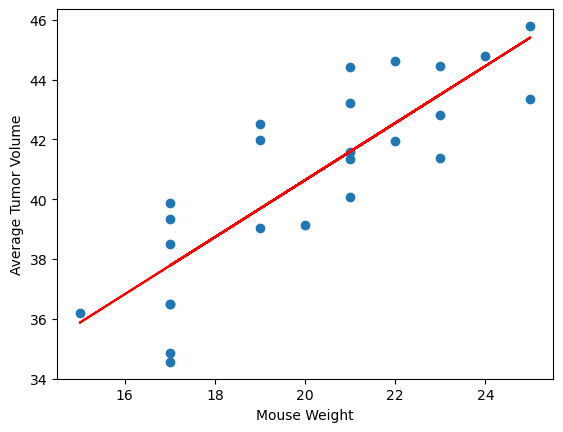

The correlation coefficient is 0.84.


In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Weight= capomulin_avg['Weight (g)']
Avg_Tumor_Vol=capomulin_avg["Tumor Volume (mm3)"]
correl_coeff= round(st.pearsonr(Weight,Avg_Tumor_Vol)[0],2)
lin_eq= st.linregress(Weight, Avg_Tumor_Vol)


plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.plot(Weight,lin_eq.intercept+lin_eq.slope*Weight,'r', label="Trend Line")
plt.show()
print(f'The correlation coefficient is {correl_coeff}.')